In [14]:
import pandas, zipfile
df = pandas.read_csv("federal-senate-2016")

In [15]:
df.head()

,year,month,congressperson_name,expense_type,cnpj_cpf,supplier,document_id,date,expense_details,reimbursement_value
0,2016,1,ACIR GURGACZ,"Rent of real estate for political office, comp...",05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011328,13/01/2016,Despesa com pagamento de energia elétrica para...,"73,6"
1,2016,1,ACIR GURGACZ,"Rent of real estate for political office, comp...",05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011327,18/01/2016,Pagamento de energia elétrica para o escritóri...,"206,84"
2,2016,1,ACIR GURGACZ,"Rent of real estate for political office, comp...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/16,04/01/2016,"Despesa com pagamento de aluguel, utilizado pa...",6000
3,2016,1,ACIR GURGACZ,"Rent of real estate for political office, comp...",05.423.963/0001-11,OI MÓVEL S.A.,661639001,16/01/2016,despesa com pagamento de telefonia para o escr...,"407,48"
4,2016,1,ACIR GURGACZ,Acquisition of consumables for use in the poli...,62.652.961/0001-38,AGÊNCIA ESTADO S.A.,00608918,06/01/2016,Aquisição de publicação virtual de conteúdo jo...,550


In [16]:
df.shape

(26691, 10)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26691 entries, 0 to 26690
Data columns (total 10 columns):
year                   26691 non-null int64
month                  26691 non-null int64
congressperson_name    26691 non-null object
expense_type           26691 non-null object
cnpj_cpf               26691 non-null object
supplier               26691 non-null object
document_id            24647 non-null object
date                   26691 non-null object
expense_details        21308 non-null object
reimbursement_value    26691 non-null object
dtypes: int64(2), object(8)
memory usage: 2.0+ MB


In [18]:
df.reimbursement_value.head()

0      73,6
1    206,84
2      6000
3    407,48
4       550
Name: reimbursement_value, dtype: object

In [19]:
df.reimbursement_value.astype(float)

ValueError: could not convert string to float: '654,28'

In [20]:
df.reimbursement_value.str.replace(",", ".").astype(float)

0          73.60
1         206.84
2        6000.00
3         407.48
4         550.00
5          40.00
6        1218.76
7        1761.34
8         451.18
9         923.30
10        373.01
11        552.74
12       1276.43
13       1469.05
14         72.59
15        315.60
16       6000.00
17        439.96
18        550.00
19        300.00
20       1308.48
21        754.25
22        826.24
23        862.97
24       1280.42
25       1655.00
26        758.04
27       1134.54
28       1305.35
29         71.10
          ...   
26661     145.57
26662      50.00
26663     176.00
26664     100.00
26665     271.41
26666     195.39
26667     160.96
26668      90.00
26669    1160.00
26670    1974.00
26671     894.60
26672    1597.50
26673    2440.32
26674    1249.56
26675     100.00
26676     200.00
26677     230.00
26678     245.52
26679     213.25
26680     251.93
26681     239.93
26682     222.58
26683     100.00
26684      23.04
26685     100.00
26686     183.40
26687      50.00
26688    1055.

In [21]:
df.reimbursement_value.head()

0      73,6
1    206,84
2      6000
3    407,48
4       550
Name: reimbursement_value, dtype: object

In [22]:
df.reimbursement_value = df.reimbursement_value.str.replace(",", ".").astype(float)
df.reimbursement_value.head()

0      73.60
1     206.84
2    6000.00
3     407.48
4     550.00
Name: reimbursement_value, dtype: float64

In [23]:
df.head()

,year,month,congressperson_name,expense_type,cnpj_cpf,supplier,document_id,date,expense_details,reimbursement_value
0,2016,1,ACIR GURGACZ,"Rent of real estate for political office, comp...",05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011328,13/01/2016,Despesa com pagamento de energia elétrica para...,73.60
1,2016,1,ACIR GURGACZ,"Rent of real estate for political office, comp...",05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011327,18/01/2016,Pagamento de energia elétrica para o escritóri...,206.84
2,2016,1,ACIR GURGACZ,"Rent of real estate for political office, comp...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/16,04/01/2016,"Despesa com pagamento de aluguel, utilizado pa...",6000.00
3,2016,1,ACIR GURGACZ,"Rent of real estate for political office, comp...",05.423.963/0001-11,OI MÓVEL S.A.,661639001,16/01/2016,despesa com pagamento de telefonia para o escr...,407.48
4,2016,1,ACIR GURGACZ,Acquisition of consumables for use in the poli...,62.652.961/0001-38,AGÊNCIA ESTADO S.A.,00608918,06/01/2016,Aquisição de publicação virtual de conteúdo jo...,550.00


In [24]:
df.describe()

,year,month,reimbursement_value
count,26691.0,26691.000000,26691.000000
mean,2016.0,6.470908,947.484513
std,0.0,3.257134,2733.820037
min,2016.0,1.000000,0.010000
25%,2016.0,4.000000,124.000000
50%,2016.0,6.000000,324.790000
75%,2016.0,9.000000,956.865000
max,2016.0,12.000000,256980.000000


In [25]:
df.reimbursement_value.describe()

count     26691.000000
mean        947.484513
std        2733.820037
min           0.010000
25%         124.000000
50%         324.790000
75%         956.865000
max      256980.000000
Name: reimbursement_value, dtype: float64

--------

E agora?
====

Temos um dataset minimo e em cima dele podemos criar algumas perguntas, como por exemplo:

- [qual maior/menor reembolso?](#Qual-maior-e-o-menor-reembolso?)
- [quem gastou mais durante 2016?](#Quem-gastou-mais?)
- [como são os gastos por mês?](#como-são-os-gastos-por-mês?)
- [quais partidos e estados gastaram mais?](#quais-partidos-e-estados-gastaram-mais?)

------

## Qual maior e o menor reembolso?

In [26]:
df.reimbursement_value.max()

256980.0

In [27]:
indice = df.reimbursement_value.idxmax()

In [28]:
df.loc[indice]

year                                                        2016
month                                                         12
congressperson_name                              DAVI ALCOLUMBRE
expense_type                 Publicity of parliamentary activity
cnpj_cpf                                      04.953.008/0001-23
supplier               ARTE & IMAGEM GRAFICA E EDITORA EIRELI ME
document_id                                                  202
date                                                  22/03/2017
expense_details                                              NaN
reimbursement_value                                       256980
Name: 4637, dtype: object

In [29]:
indice = df.reimbursement_value.idxmin()
df.loc[indice]

year                                                                2016
month                                                                  3
congressperson_name                              FERNANDO BEZERRA COELHO
expense_type                      National air, water and land transport
cnpj_cpf                                              07.575.651/0001-59
supplier                                                             GOL
document_id                                                       NFPJ4Z
date                                                          22/03/2016
expense_details        Companhia Aérea: GOL, Localizador: NFPJ4Z. Pas...
reimbursement_value                                                 0.01
Name: 6847, dtype: object

----------
## Quem gastou mais?

In [30]:
por_pessoa = df.groupby("congressperson_name")
por_pessoa.reimbursement_value.describe()

,count,mean,std,min,25%,50%,75%,max
congressperson_name,,,,,,,,
ACIR GURGACZ,140.0,2156.934857,2864.690150,40.00,591.3275,1547.590,2084.8775,19800.00
ALOYSIO NUNES FERREIRA,432.0,661.846296,1357.902019,5.55,104.4000,178.485,777.6025,8266.00
ALVARO DIAS,150.0,886.473000,435.867230,178.00,541.0450,795.505,1120.8400,2196.25
ANA AMÉLIA,397.0,420.882695,498.887655,8.00,72.4900,195.000,628.8600,2759.21
ANTONIO ANASTASIA,273.0,1144.545458,1532.358356,22.00,362.9800,633.940,1017.0000,6613.31
ANTÔNIO CARLOS VALADARES,155.0,1713.440452,1650.345721,250.83,577.5350,1045.000,2316.6500,5900.00
ARMANDO MONTEIRO,232.0,675.458707,1027.924855,4.08,169.9225,412.800,812.5225,7420.00
ATAÍDES OLIVEIRA,175.0,1712.092629,3079.333122,85.00,793.4100,979.400,1500.0000,17500.00
AÉCIO NEVES,307.0,962.006026,1854.973271,15.00,72.5000,326.600,900.0000,9000.00


In [31]:
import numpy
por_pessoa.agg({"reimbursement_value": [sum, numpy.mean, numpy.std]})

reimbursement_value                            
                                         sum          mean           std
congressperson_name                                                     
ACIR GURGACZ                       301970.88   2156.934857   2864.690150
ALOYSIO NUNES FERREIRA             285917.60    661.846296   1357.902019
ALVARO DIAS                        132970.95    886.473000    435.867230
ANA AMÉLIA                         167090.43    420.882695    498.887655
ANTONIO ANASTASIA                  312460.91   1144.545458   1532.358356
ANTÔNIO CARLOS VALADARES           265583.27   1713.440452   1650.345721
ARMANDO MONTEIRO                   156706.42    675.458707   1027.924855
ATAÍDES OLIVEIRA                   299616.21   1712.092629   3079.333122
AÉCIO NEVES                        295335.85    962.006026   1854.973271
BENEDITO DE LIRA                   172961.28    645.377910    856.757007
BLAIRO MAGGI                       108393.18   1372.065570   2252.756787
CIDINHO SANTOS                     232399.98   1489.743462   2054.534316
CIRO NOGUEIRA                      440047.81   1341.609177   1955.232902
CRISTOVAM BUARQUE                  107600.00  15371.428571  12115.377871
CÁSSIO CUNHA LIMA                  170378.90    668.152549   1016.598787
DALIRIO BEBER                      214115.91    393.595423    574.972304
DAVI ALCOLUMBRE                    510076.07   3835.158421  22271.242467
DECA                               133912.76   1046.193438   1405.788875
DONIZETI NOGUEIRA                  109265.86    600.361868   1170.831507
DOUGLAS CINTRA                      74002.63    685.209537    972.108468
DÁRIO BERGER                       319814.09    723.561290   1038.533209
EDISON LOBÃO                       151556.51   3294.706739   5240.292523
EDUARDO AMORIM                     306258.14    648.851992    817.621372
EDUARDO BRAGA                      293426.22   2529.536379   2790.122521
EDUARDO LOPES                      110289.65    829.245489   2961.260094
ELMANO FÉRRER                      428961.30   1469.045548   1644.973324
FERNANDO BEZERRA COELHO            435141.96    724.029884   1459.551181
FERNANDO COLLOR                    420471.01  20022.429048   7545.173689
FLEXA RIBEIRO                      364022.34   1067.514194   2079.523837
FÁTIMA BEZERRA                     335308.94    528.045575    685.527010
...                                      ...           ...           ...
PINTO ITAMARATY                     85377.22   2587.188485   3408.834811
RAIMUNDO LIRA                      174400.00   1726.732673    481.433503
RANDOLFE RODRIGUES                 471847.84   1429.841939   1686.607948
REGINA SOUSA                       311987.13    957.015736   1845.580891
RENAN CALHEIROS                     67359.63    962.280429   1131.586370
RICARDO FERRAÇO                    279506.91    944.280101   1568.568888
RICARDO FRANCO                      75385.69    919.337683   1401.637879
ROBERTO MUNIZ                      188559.77    528.178627    727.286524
ROBERTO REQUIÃO                    309428.14    603.173762    962.259881
ROBERTO ROCHA                      364903.02   3145.715690   3816.869175
ROMERO JUCÁ                        446448.98   1023.965550   1369.313814
ROMÁRIO                            341345.94   1906.960559   2608.047684
RONALDO CAIADO                     235825.91    407.298636    669.208603
ROSE DE FREITAS                    396088.44   1128.457094   4304.023370
SANDRA BRAGA                       117107.15   2856.271951   2950.018999
SIMONE TEBET                       200693.60    891.971556    832.343717
SÉRGIO PETECÃO                     463456.45   3707.651600  11757.386179
TASSO JEREISSATI                   184004.32   3833.423333   5596.315142
TELMÁRIO MOTA                      488678.92    833.923072   1993.159838
VALDIR RAUPP                       415018.64   1343.102395   2122.107585
VANESSA GRAZZIOTIN                 477079.76   1716.114245   2601.589275
VICENTINHO

In [32]:
por_pessoa.agg({"reimbursement_value": [sum, numpy.mean, numpy.std, max]}).sort_values([
        ("reimbursement_value", "std"),
        ("reimbursement_value", "sum")
    ],
    ascending=False
)

reimbursement_value                              \
                                      sum          mean           std   
congressperson_name                                                     
DAVI ALCOLUMBRE                 510076.07   3835.158421  22271.242467   
OMAR AZIZ                       390372.08  21687.337778  16216.921826   
CRISTOVAM BUARQUE               107600.00  15371.428571  12115.377871   
SÉRGIO PETECÃO                  463456.45   3707.651600  11757.386179   
FERNANDO COLLOR                 420471.01  20022.429048   7545.173689   
TASSO JEREISSATI                184004.32   3833.423333   5596.315142   
VICENTINHO ALVES                299890.52   4052.574595   5467.742757   
EDISON LOBÃO                    151556.51   3294.706739   5240.292523   
HÉLIO JOSÉ                      244198.49   1453.562440   4673.996864   
ÂNGELA PORTELA                  429605.98   2512.315673   4580.254034   
ROSE DE FREITAS                 396088.44   1128.457094   4304.023370   
ZEZÉ PERRELLA                   322433.80    810.135176   4199.936436   
ROBERTO ROCHA                   364903.02   3145.715690   3816.869175   
PINTO ITAMARATY                  85377.22   2587.188485   3408.834811   
ATAÍDES OLIVEIRA                299616.21   1712.092629   3079.333122   
EDUARDO LOPES                   110289.65    829.245489   2961.260094   
SANDRA BRAGA                    117107.15   2856.271951   2950.018999   
ACIR GURGACZ                    301970.88   2156.934857   2864.690150   
EDUARDO BRAGA                   293426.22   2529.536379   2790.122521   
MARTA SUPLICY                   291299.63   1288.936416   2699.032299   
ROMÁRIO                         341345.94   1906.960559   2608.047684   
VANESSA GRAZZIOTIN              477079.76   1716.114245   2601.589275   
GLEISI HOFFMANN                 343492.72    740.286034   2591.309074   
GLADSON CAMELI                  459977.83   1789.797004   2589.188238   
BLAIRO MAGGI                    108393.18   1372.065570   2252.756787   
JOSÉ AGRIPINO                   306939.26   1993.112078   2130.336966   
VALDIR RAUPP                    415018.64   1343.102395   2122.107585   
FLEXA RIBEIRO                   364022.34   1067.514194   2079.523837   
CIDINHO SANTOS                  232399.98   1489.743462   2054.534316   
TELMÁRIO MOTA                   488678.92    833.923072   1993.159838   
...                                   ...           ...           ...   
LASIER MARTINS                  240840.73    937.123463   1176.270302   
DONIZETI NOGUEIRA               109265.86    600.361868   1170.831507   
RENAN CALHEIROS                  67359.63    962.280429   1131.586370   
JORGE VIANA                     363350.03    784.773283   1111.152005   
MAGNO MALTA                     378840.79   1353.002821   1066.415158   
DÁRIO BERGER                    319814.09    723.561290   1038.533209   
ARMANDO MONTEIRO                156706.42    675.458707   1027.924855   
JOSÉ SERRA                      114621.90    573.109500   1025.189298   
CÁSSIO CUNHA LIMA               170378.90    668.152549   1016.598787   
DOUGLAS CINTRA                   74002.63    685.209537    972.108468   
ROBERTO REQUIÃO                 309428.14    603.173762    962.259881   
PAULO BAUER                     394455.84    498.679949    932.483707   
GARIBALDI ALVES FILHO           196293.49    752.082337    924.401415   
LINDBERGH FARIAS                377653.66   1082.102178    900.506884   
BENEDITO DE LIRA                172961.28    645.377910    856.757007   
WALTER PINHEIRO                  78455.02    622.658889    839.184778   
SIMONE TEBET                    200693.60    891.971556    832.343717   
WALDEMIR MOKA                   265638.06    633.981050    821.418792   
EDUARDO AMORIM                  306258.14    648.851992    817.621372   
JOSÉ MARANHÃO                   250753.45    957.074237    741.710270   
ROBERTO MUNIZ                   188559.77    528.178627    727.286524   
FÁTIMA 

In [33]:
gastador = df[df["congressperson_name"] == "DAVI ALCOLUMBRE"]
gastador.groupby("expense_type").reimbursement_value.count()

expense_type
Locomotion, lodging, food, fuels and lubricants                                                                                                         34
National air, water and land transport                                                                                                                  55
Publicity of parliamentary activity                                                                                                                      2
Recruitment of consultancies, advisory services, research, technical work and other services in support of the exercise of the parliamentary mandate     1
Rent of real estate for political office, comprising expenses concerning them                                                                           41
Name: reimbursement_value, dtype: int64

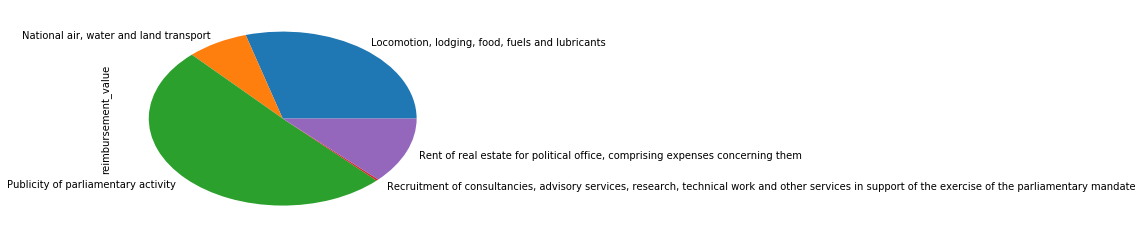

In [34]:
%matplotlib inline
gastador.groupby("expense_type").reimbursement_value.sum().plot(kind="pie")

-----------
## como são os gastos por mês?

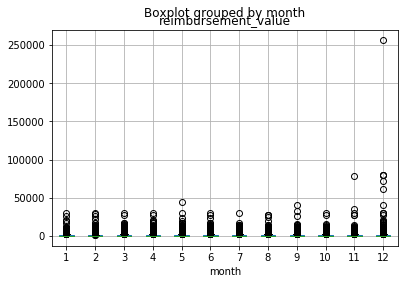

In [35]:
df.boxplot(column="reimbursement_value", by="month")

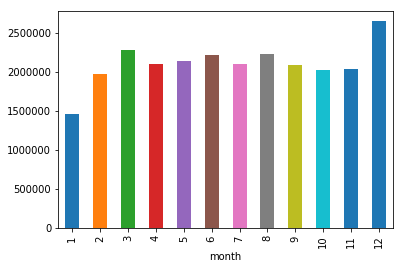

In [37]:
por_mes = df.groupby("month")
por_mes.reimbursement_value.sum().plot(kind="bar")

In [57]:
por_expense_type = pandas.crosstab(
    index=df.expense_type,
    columns=df.month,
    values=df.reimbursement_value,
    aggfunc=numpy.sum
)
por_expense_type

month,1,2,3,4,5,6,7,8,9,10,11,12
expense_type,,,,,,,,,,,,
"Acquisition of consumables for use in the political office, including acquisition or leasing of software, postal expenses, acquisition of publications, rental of furniture and equipment",72464.58,95622.67,86689.23,89751.24,84847.06,90025.80,100578.11,88666.88,82566.49,83382.94,85632.50,93770.75
"Locomotion, lodging, food, fuels and lubricants",373081.30,470910.65,526333.34,471441.48,467726.59,480589.29,622530.60,529582.56,620526.43,491455.90,415616.98,446097.87
"National air, water and land transport",190543.44,451277.90,635800.52,556828.37,546786.53,603512.29,505547.72,603700.31,488860.02,568453.54,606522.27,391910.20
Private Security Services,52280.03,51375.12,49677.47,40010.08,44902.60,45015.33,8159.13,62586.03,32747.15,36012.36,35917.60,36186.98
Publicity of parliamentary activity,173923.17,222693.49,237323.72,262815.02,268376.78,269596.00,248577.17,261390.66,251446.30,205395.21,256707.00,927221.27
"Recruitment of consultancies, advisory services, research, technical work and other services in support of the exercise of the parliamentary mandate",213084.63,260918.32,297243.39,249704.43,305240.14,282839.14,202025.57,237189.84,199793.99,209980.66,249945.24,401176.41
"Rent of real estate for political office, comprising expenses concerning them",387716.41,423858.67,441217.01,430179.71,425730.73,438865.16,409113.87,442999.22,410624.24,425457.97,388960.76,355473.61


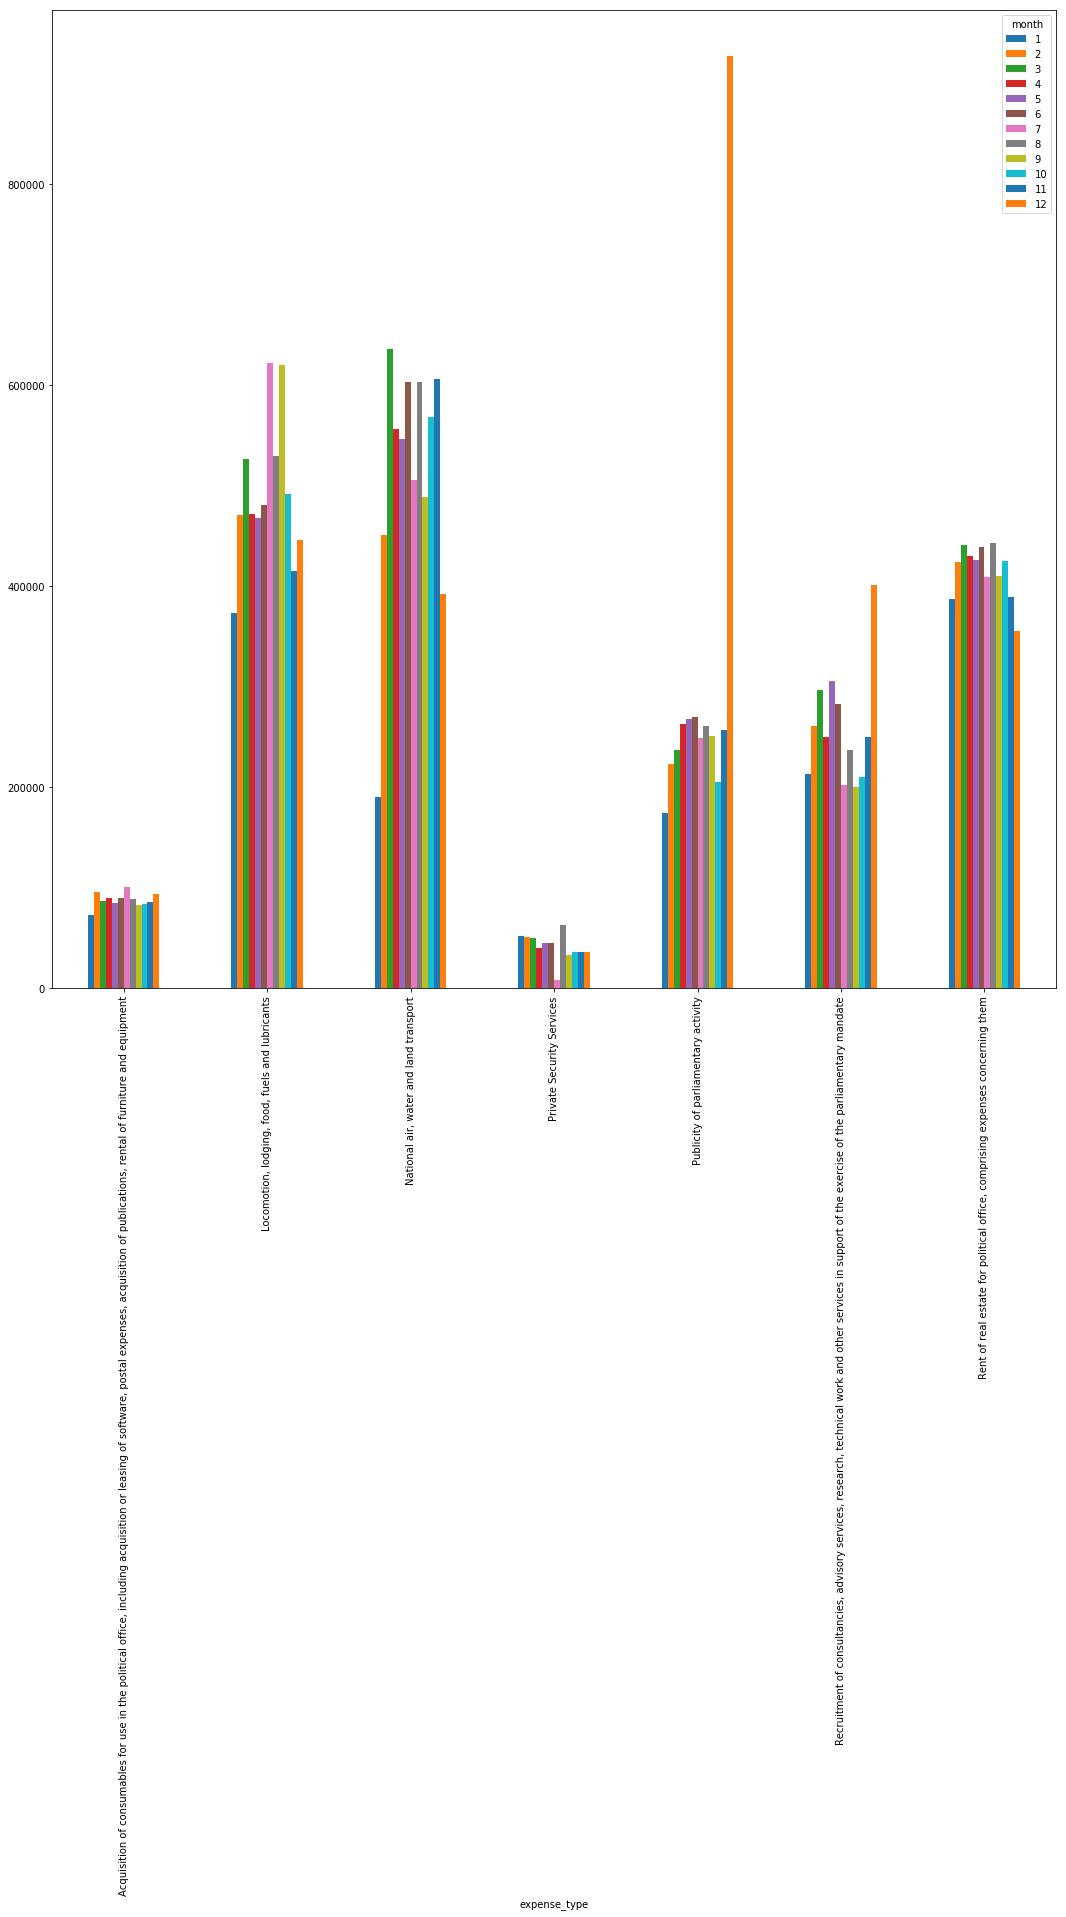

In [67]:
por_expense_type.plot(kind="bar", figsize=(18,18))

----------
## quais partidos e estados gastaram mais?

In [68]:
df.head()

,year,month,congressperson_name,expense_type,cnpj_cpf,supplier,document_id,date,expense_details,reimbursement_value
0,2016,1,ACIR GURGACZ,"Rent of real estate for political office, comp...",05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011328,13/01/2016,Despesa com pagamento de energia elétrica para...,73.60
1,2016,1,ACIR GURGACZ,"Rent of real estate for political office, comp...",05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011327,18/01/2016,Pagamento de energia elétrica para o escritóri...,206.84
2,2016,1,ACIR GURGACZ,"Rent of real estate for political office, comp...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/16,04/01/2016,"Despesa com pagamento de aluguel, utilizado pa...",6000.00
3,2016,1,ACIR GURGACZ,"Rent of real estate for political office, comp...",05.423.963/0001-11,OI MÓVEL S.A.,661639001,16/01/2016,despesa com pagamento de telefonia para o escr...,407.48
4,2016,1,ACIR GURGACZ,Acquisition of consumables for use in the poli...,62.652.961/0001-38,AGÊNCIA ESTADO S.A.,00608918,06/01/2016,Aquisição de publicação virtual de conteúdo jo...,550.00


In [69]:
senadores_additional_info = pandas.read_html("senadores.html", encoding="utf-8")

In [70]:
senadores_additional_info

[    Unnamed: 0_level_0                                               Nome  \
                   Acre                                 Unnamed: 1_level_1   
 0                  NaN            Gladson Cameli (Gladson de Lima Cameli)   
 1                  NaN         Jorge Viana (Jorge Ney Viana Macedo Neves)   
 2                  NaN          Sérgio Petecão (Sérgio de Oliveira Cunha)   
 3              Alagoas                                                NaN   
 4                  NaN                                   Benedito de Lira   
 5                  NaN  Fernando Collor (Fernando Affonso Collor de Me...   
 6                  NaN  Renan Calheiros (José Renan Vasconcelos Calhei...   
 7                Amapá                                                NaN   
 8                  NaN  Davi Alcolumbre (David Samuel Alcolumbre Tobelem)   
 9                  NaN  João Capiberibe (João Alberto Rodrigues Capibe...   
 10                 NaN  Randolfe Rodrigues (Randolph Frederich 

In [71]:
type(senadores_additional_info)

list

In [72]:
type(senadores_additional_info[0])

pandas.core.frame.DataFrame

In [73]:
senadores_additional_info = senadores_additional_info[0]

In [74]:
senadores_additional_info.head()

,Unnamed: 0_level_0,Nome,Partido,Início de mandato,Fim de mandato,Obs.
,Acre,Unnamed: 1_level_1,Unnamed: 2_level_1,Unnamed: 3_level_1,Unnamed: 4_level_1,Unnamed: 5_level_1
0,NaN,Gladson Cameli (Gladson de Lima Cameli),PP,2015.0,2023.0,NaN
1,NaN,Jorge Viana (Jorge Ney Viana Macedo Neves),PT,2011.0,2019.0,NaN
2,NaN,Sérgio Petecão (Sérgio de Oliveira Cunha),PSD,2011.0,2019.0,NaN
3,Alagoas,NaN,NaN,NaN,NaN,NaN
4,NaN,Benedito de Lira,PP,2011.0,2019.0,NaN


--------
Nossos dados estão com varios problemas, precisamos trata-los antes de fazer o merge com o nosso dataframe principal.

Vamos então:
* excluir colunas que nao fazem sentido
* renomear as colunas
* normalizar a coluna de estado
* tratar o nome dos senadores pois esse será nosso ponto de merge.

In [76]:
del senadores_additional_info["Início de mandato"]
del senadores_additional_info["Fim de mandato"]
del senadores_additional_info["Obs."]

In [77]:
senadores_additional_info.head()

,Unnamed: 0_level_0,Nome,Partido
,Acre,Unnamed: 1_level_1,Unnamed: 2_level_1
0,NaN,Gladson Cameli (Gladson de Lima Cameli),PP
1,NaN,Jorge Viana (Jorge Ney Viana Macedo Neves),PT
2,NaN,Sérgio Petecão (Sérgio de Oliveira Cunha),PSD
3,Alagoas,NaN,NaN
4,NaN,Benedito de Lira,PP


In [78]:
senadores_additional_info.rename(columns={"Unnamed: 0_level_0": "estado", "Nome": "nome", "Partido": "partido"}, inplace=True)
senadores_additional_info.head()

,estado,nome,partido
,Acre,Unnamed: 1_level_1,Unnamed: 2_level_1
0,NaN,Gladson Cameli (Gladson de Lima Cameli),PP
1,NaN,Jorge Viana (Jorge Ney Viana Macedo Neves),PT
2,NaN,Sérgio Petecão (Sérgio de Oliveira Cunha),PSD
3,Alagoas,NaN,NaN
4,NaN,Benedito de Lira,PP


In [80]:
estado = "Acre"
for i, row in senadores_additional_info.iterrows():
    if pandas.isnull(row["estado"][0]):
        senadores_additional_info.loc[i]["estado"] = estado
    else:
        estado = row["estado"][0]

In [81]:
senadores_additional_info.head()

,estado,nome,partido
,Acre,Unnamed: 1_level_1,Unnamed: 2_level_1
0,Acre,Gladson Cameli (Gladson de Lima Cameli),PP
1,Acre,Jorge Viana (Jorge Ney Viana Macedo Neves),PT
2,Acre,Sérgio Petecão (Sérgio de Oliveira Cunha),PSD
3,Alagoas,NaN,NaN
4,Alagoas,Benedito de Lira,PP


In [84]:
senadores_additional_info.dropna(inplace=True)

In [85]:
senadores_additional_info.columns = ['estado', 'nome', 'partido']
senadores_additional_info.head()

,estado,nome,partido
0,Acre,Gladson Cameli (Gladson de Lima Cameli),PP
1,Acre,Jorge Viana (Jorge Ney Viana Macedo Neves),PT
2,Acre,Sérgio Petecão (Sérgio de Oliveira Cunha),PSD
4,Alagoas,Benedito de Lira,PP
5,Alagoas,Fernando Collor (Fernando Affonso Collor de Me...,PTC


In [86]:
senadores_additional_info.nome.str.replace(r"\s\(.*\)", "")

0                Gladson Cameli
1                   Jorge Viana
2                Sérgio Petecão
4              Benedito de Lira
5               Fernando Collor
6               Renan Calheiros
8               Davi Alcolumbre
9               João Capiberibe
10           Randolfe Rodrigues
12                Eduardo Braga
13                    Omar Aziz
14           Vanessa Grazziotin
16               Lídice da Mata
17                 Otto Alencar
18                Roberto Muniz
20             Eunício Oliveira
21                José Pimentel
22             Tasso Jereissati
24            Cristovam Buarque
25                   Hélio José
26                      Reguffe
28                  Magno Malta
29              Ricardo Ferraço
30              Rose de Freitas
32                  Lúcia Vânia
33               Ronaldo Caiado
34                Wilder Morais
36                 Edison Lobão
37           João Alberto Souza
38                Roberto Rocha
                 ...           
68      

In [88]:
senadores_additional_info.nome = senadores_additional_info.nome.str.replace(r"\s\(.*\)", "")
senadores_additional_info.nome = senadores_additional_info.nome.str.upper()

In [89]:
senadores_additional_info.head()

,estado,nome,partido
0,Acre,GLADSON CAMELI,PP
1,Acre,JORGE VIANA,PT
2,Acre,SÉRGIO PETECÃO,PSD
4,Alagoas,BENEDITO DE LIRA,PP
5,Alagoas,FERNANDO COLLOR,PTC


In [90]:
senadores_additional_info.count()

estado     81
nome       81
partido    81
dtype: int64

In [92]:
len(df.congressperson_name.unique())

93

In [95]:
suplentes = pandas.read_html("suplentes.html", encoding="utf-8")[0]

In [96]:
suplentes.head()

,Unnamed: 0,Nome,Partido,Estado,Titular,Período(s) exercido(s),Obs.
0,NaN,Deca Sobrinho (José Gonzaga Sobrinho),PSDB,Paraíba,Cássio Cunha Lima,2015 - 2016,Primeiro suplente
1,NaN,Donizeti Nogueira (Divino Donizeti Borges Nogu...,PT,Tocantins,Kátia Abreu,2015-2016,Primeiro suplente
2,NaN,Douglas Cintra (Douglas Mauricio Ramos Cintra),PTB,Pernambuco,Armando Monteiro,2015-2016,Primeiro suplente
3,NaN,Fernando Ribeiro (Fernando de Castro Ribeiro),PMDB,Pará,Jader Barbalho,2015,Primeiro suplente
4,NaN,Gilberto Piselo (Gilberto Piselo do Nascimento),PDT,Rondônia,Acir Gurgacz,2016,Primeiro suplente


In [97]:
del suplentes["Unnamed: 0"]
del suplentes["Período(s) exercido(s)"]
del suplentes["Obs."]
suplentes.head()

,Nome,Partido,Estado,Titular
0,Deca Sobrinho (José Gonzaga Sobrinho),PSDB,Paraíba,Cássio Cunha Lima
1,Donizeti Nogueira (Divino Donizeti Borges Nogu...,PT,Tocantins,Kátia Abreu
2,Douglas Cintra (Douglas Mauricio Ramos Cintra),PTB,Pernambuco,Armando Monteiro
3,Fernando Ribeiro (Fernando de Castro Ribeiro),PMDB,Pará,Jader Barbalho
4,Gilberto Piselo (Gilberto Piselo do Nascimento),PDT,Rondônia,Acir Gurgacz


In [98]:
suplentes.columns = ["nome", "partido", "estado", "titular"]
suplentes.nome = suplentes.nome.str.replace(r"\s\(.*\)", "").str.upper()
suplentes.titular = suplentes.titular.str.replace(r"\s\(.*\)", "").str.upper()
suplentes.head()

,nome,partido,estado,titular
0,DECA SOBRINHO,PSDB,Paraíba,CÁSSIO CUNHA LIMA
1,DONIZETI NOGUEIRA,PT,Tocantins,KÁTIA ABREU
2,DOUGLAS CINTRA,PTB,Pernambuco,ARMANDO MONTEIRO
3,FERNANDO RIBEIRO,PMDB,Pará,JADER BARBALHO
4,GILBERTO PISELO,PDT,Rondônia,ACIR GURGACZ


In [99]:
suplentes.count()

nome       13
partido    13
estado     13
titular    13
dtype: int64

In [100]:
senadores = pandas.concat([senadores_additional_info, suplentes])

In [103]:
senadores.reset_index(inplace=True, drop=True)

In [104]:
senadores.head()

,index,estado,nome,partido,titular
0,0,Acre,GLADSON CAMELI,PP,NaN
1,1,Acre,JORGE VIANA,PT,NaN
2,2,Acre,SÉRGIO PETECÃO,PSD,NaN
3,4,Alagoas,BENEDITO DE LIRA,PP,NaN
4,5,Alagoas,FERNANDO COLLOR,PTC,NaN


In [105]:
del senadores["index"]

In [107]:
df_completo = df.merge(senadores, how="left", left_on="congressperson_name", right_on="nome")
df_completo.head()

,year,month,congressperson_name,expense_type,cnpj_cpf,supplier,document_id,date,expense_details,reimbursement_value,estado,nome,partido,titular
0,2016,1,ACIR GURGACZ,"Rent of real estate for political office, comp...",05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011328,13/01/2016,Despesa com pagamento de energia elétrica para...,73.60,Rondônia,ACIR GURGACZ,PDT,NaN
1,2016,1,ACIR GURGACZ,"Rent of real estate for political office, comp...",05.914.650/0001-66,ELETROBRÁS DISTRIBUIÇÃO RONDÔNIA,000011327,18/01/2016,Pagamento de energia elétrica para o escritóri...,206.84,Rondônia,ACIR GURGACZ,PDT,NaN
2,2016,1,ACIR GURGACZ,"Rent of real estate for political office, comp...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/16,04/01/2016,"Despesa com pagamento de aluguel, utilizado pa...",6000.00,Rondônia,ACIR GURGACZ,PDT,NaN
3,2016,1,ACIR GURGACZ,"Rent of real estate for political office, comp...",05.423.963/0001-11,OI MÓVEL S.A.,661639001,16/01/2016,despesa com pagamento de telefonia para o escr...,407.48,Rondônia,ACIR GURGACZ,PDT,NaN
4,2016,1,ACIR GURGACZ,Acquisition of consumables for use in the poli...,62.652.961/0001-38,AGÊNCIA ESTADO S.A.,00608918,06/01/2016,Aquisição de publicação virtual de conteúdo jo...,550.00,Rondônia,ACIR GURGACZ,PDT,NaN


In [108]:
del df_completo["nome"]

reimbursement_value    100.0
dtype: float64


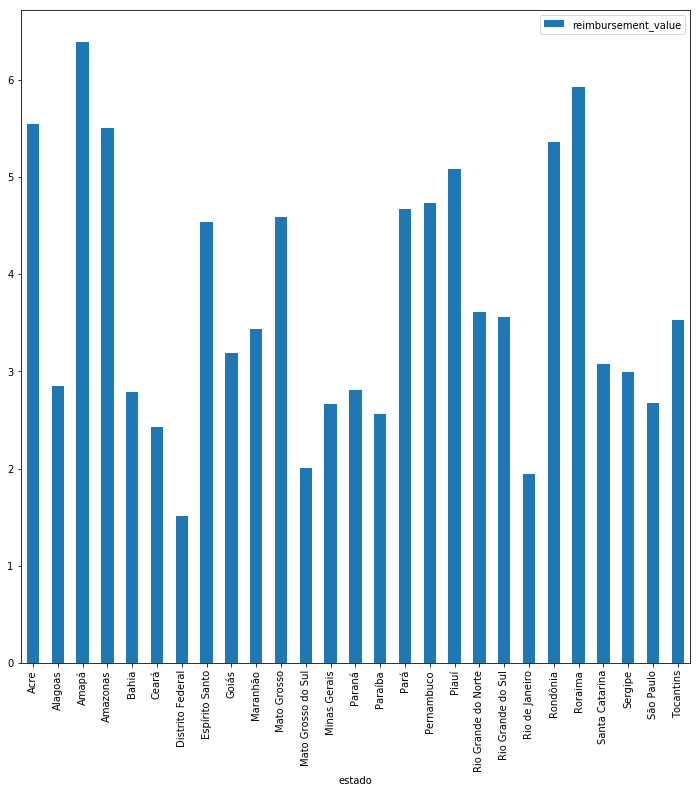

In [111]:
por_estado = df_completo.groupby("estado")
gasto_estado = por_estado.agg({"reimbursement_value": "sum"})
gasto_estado_percent = gasto_estado.apply(lambda x: 100 * x / float(x.sum()))
gasto_estado_percent.plot.bar(figsize=(12,12))

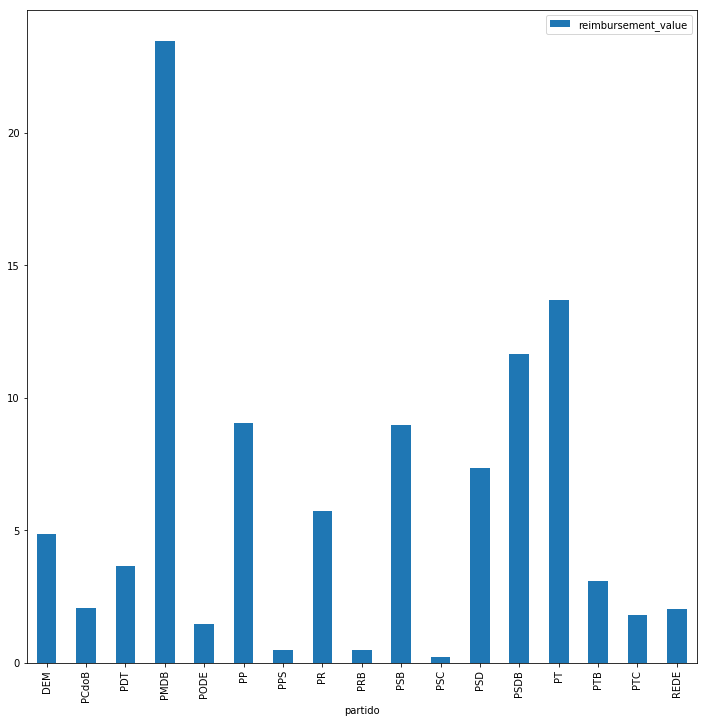

In [113]:
por_partido = df_completo.groupby("partido")
gasto_partido = por_partido.agg({"reimbursement_value": "sum"})
gasto_partido_percent = gasto_partido.apply(lambda x: 100 * x / float(x.sum()))
gasto_partido_percent.plot.bar(figsize=(12,12))

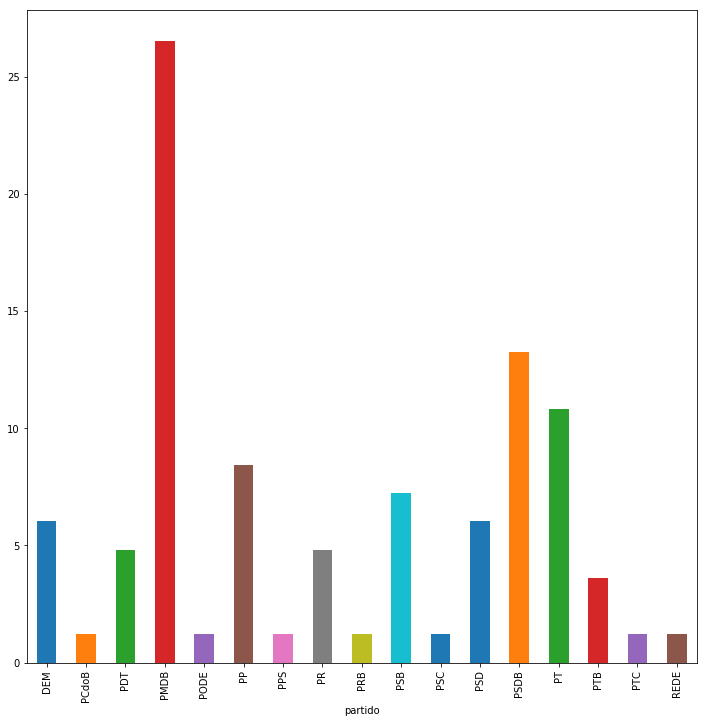

In [115]:
partidos = por_partido.congressperson_name.unique()
qtd_partido = partidos.aggregate(lambda x: len(x))
qtd_partido_percent = qtd_partido.apply(lambda x: 100 * x / float(qtd_partido.sum()))
qtd_partido_percent.plot.bar(figsize=(12,12))

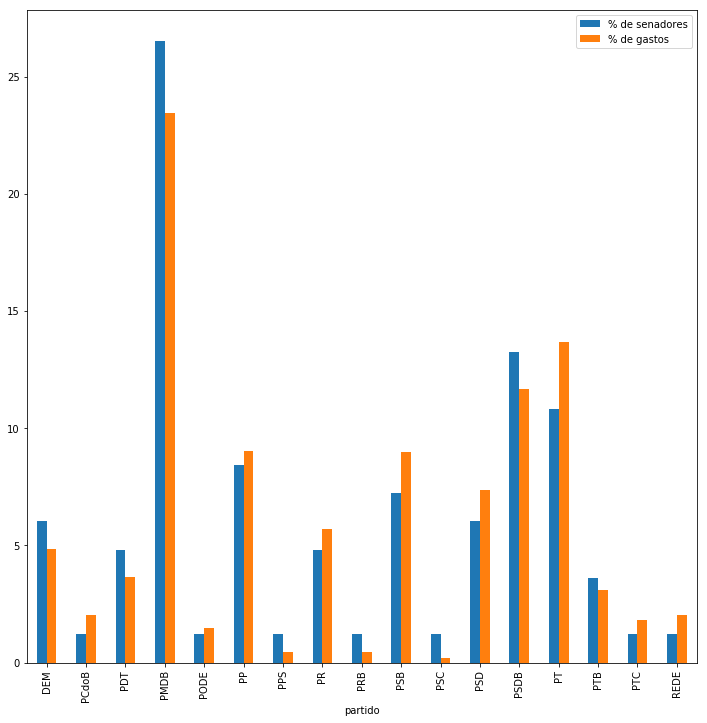

In [116]:
#gasto por partido / quantidade de senadores em cada partido.
qtd_partido_df = qtd_partido_percent.to_frame()
ndf = pandas.concat([qtd_partido_df, gasto_partido_percent], axis=1)
ndf = ndf.rename(columns={"congressperson_name": "% de senadores", "reimbursement_value": "% de gastos"})
ndf.plot.bar(figsize=(12,12))

In [118]:
ndf

,% de senadores,% de gastos
partido,,
DEM,6.024096,4.868811
PCdoB,1.204819,2.054714
PDT,4.819277,3.639673
PMDB,26.506024,23.452885
PODE,1.204819,1.470128
PP,8.433735,9.029590
PPS,1.204819,0.463418
PR,4.819277,5.712120
PRB,1.204819,0.475002
